In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
barstuff=np.genfromtxt('bar.txt') #change the name of file based on where you saved 
time=barstuff[:,0]
angle=barstuff[:,1]
#for i in range(len(angle)):
#    if angle[i]<0:
#        angle[i]=2*np.pi+angle[i]

print(np.rad2deg(angle))

[-210.6503398  -179.35280672 -160.04263934 -137.68187276 -126.66360788
  -73.62358698  -38.29145127  -13.63656741   -4.47466975    8.94632917
   34.55321105 -262.45924629 -184.23646979 -109.89599801  -89.80425889
  -64.81229824  -41.36551308  -20.32205096 -235.59789623 -211.62058653
 -181.94349269 -155.10105024 -145.94524197 -127.80763271 -112.18290175
  -97.16344341  -82.03661277  -57.64516918  -36.87293955  -20.78599207
  -17.52311775   -5.64137053   10.13729643   27.03506513   40.96471191
   60.29395306   69.73589646   80.28382028 -257.61082013 -207.54788793
 -135.71582538  -98.1585565   -69.19926419  -45.28497985  -27.61206228
   -8.98592055    9.64914212   29.86714967   48.7686721    76.50057996
 -266.65593295 -241.84938144 -217.71473753 -176.68477145 -120.12770643
  -74.82473571  -44.71740785  -10.14692212   21.47423471   52.83550361
   79.64921223 -255.16371739 -233.69080621 -215.68102384 -200.13432973
 -186.87362263 -171.21646226 -154.64400181 -141.87454872 -127.32010292
 -110.

In [6]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import coords as coords
import os
import sys
from procedure import *

save_datapath="./"

start=0
finish=510

#orbit=open('bar_angles_raw.txt','w') #run with caution it recreates the file if you run it again
barangle=0.

for i in range(start,finish):
    snapshot=i
    snaparr = loadwholesnap(path,snapshot)
    mass=snaparr['mass']  #note mass here is in solar mass (use the factor 2.324876e9)
    r=snaparr['r']
    phi=snaparr['phi']
        
    #calculating bar_angle
    discindx=(mass<5000)
    #barsample=(r>1)*(r<4)*discindx
    barsample=(r<5)*(r>1)
    #counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
    counts, _ = np.histogram(phi[barsample], bins = np.linspace(-np.pi, np.pi, 360))
    ff=np.fft.fft(counts-np.mean(counts))
    barangle=-np.angle(ff[2])/2.
    
    TU=9.778145/1000.
    
    print("Calculated barangle at snapshot:",i," bar_angle is",np.rad2deg(barangle))
    print("%E %E" %(i,barangle), file=orbit, flush=True)


start at: 2022-04-01 19:02:59.990677
end at: 2022-04-01 19:02:59.993453
Calculated barangle at snapshot: 0  bar_angle is -30.65035121046186
Calculated barangle at snapshot: 1  bar_angle is 0.6471922892699065
Calculated barangle at snapshot: 2  bar_angle is 19.957347199903932
Calculated barangle at snapshot: 3  bar_angle is 42.31811561765191
Calculated barangle at snapshot: 4  bar_angle is 53.336369897833634
Calculated barangle at snapshot: 5  bar_angle is -73.62356827502956
Calculated barangle at snapshot: 6  bar_angle is -38.291451821693386
Calculated barangle at snapshot: 7  bar_angle is -13.636566391349216
Calculated barangle at snapshot: 8  bar_angle is -4.474669980701091
Calculated barangle at snapshot: 9  bar_angle is 8.946329568930398
Calculated barangle at snapshot: 10  bar_angle is 34.55321132098588
Calculated barangle at snapshot: 11  bar_angle is -82.45927036980264
Calculated barangle at snapshot: 12  bar_angle is -4.236465388878577
Calculated barangle at snapshot: 13  bar_a

[-5.349495e-01  1.129564e-02  3.483214e-01  7.385905e-01  9.308953e-01
 -1.284974e+00 -6.683119e-01 -2.380030e-01 -7.809772e-02  1.561429e-01
  6.030673e-01 -1.439186e+00 -7.394027e-02  1.223545e+00 -1.567380e+00
 -1.131188e+00 -7.219644e-01 -3.546867e-01 -9.703666e-01 -5.518837e-01
 -3.391994e-02  4.345687e-01  5.943680e-01  9.109282e-01  1.183631e+00
  1.445771e+00 -1.431809e+00 -1.006098e+00 -6.435542e-01 -3.627840e-01
 -3.058361e-01 -9.846049e-02  1.769292e-01  4.718509e-01  7.149691e-01
  1.052328e+00  1.217121e+00  1.401217e+00 -1.354565e+00 -4.808010e-01
  7.729050e-01  1.428403e+00 -1.207755e+00 -7.903720e-01 -4.819214e-01
 -1.568339e-01  1.684093e-01  5.212801e-01  8.511739e-01  1.335187e+00
 -1.512432e+00 -1.079475e+00 -6.582462e-01  5.786171e-02  1.044969e+00
 -1.305938e+00 -7.804660e-01 -1.770972e-01  3.747961e-01  9.221535e-01
  1.390141e+00 -1.311855e+00 -9.370814e-01 -6.227517e-01 -3.514101e-01
 -1.199669e-01  1.533015e-01  4.425461e-01  6.654151e-01  9.194379e-01
  1.22

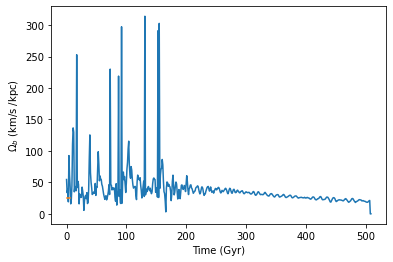

In [5]:
barstuff=np.genfromtxt('bar_angles_raw.txt') #change the name of file based on where you saved 
time=barstuff[:,0]
angle=barstuff[:,1]

print(angle)        

TU=0.00977
PS=np.empty(len(angle-1))
for i in range(1,len(angle)-1):
    PS[i-1]=(angle[i]-angle[i-1])/TU
    if angle[i]<angle[i-1]:
        diff=angle[i]-angle[i-1]
        ang_diff=angle[i]+np.pi-angle[i-1]
        #print("angle[i]<angle[i-1]",diff,ang_diff)
        PS[i-1]=ang_diff/TU
          
    if PS[i-1]<0.:
        ang_diff=angle[i]+2*np.pi-angle[i-1]
        #print(ang_diff)
        PS[i-1]=ang_diff/TU
        print(PS[i-1])
PS=PS*3.08567758/3.15576
plt.plot(time,PS)
plt.plot([0,5],[26,26])
#plt.ylim(25,30)
plt.ylabel(r'$\Omega_b$ (km/s /kpc)')
plt.xlabel('Time (Gyr)')
plt.show()